In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist  #필기체 손글씨
from tensorflow.keras import utils
import tensorflow as tf

In [3]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

In [4]:
(x_train , y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
x_train[0].shape

(28, 28)

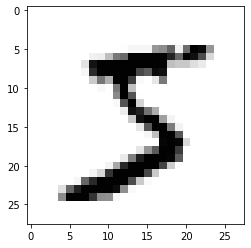

In [7]:
plt.imshow(x_train[0],cmap='Greys')

In [8]:
x_train_vec = x_train.reshape(60000, 28*28)
x_test_vec = x_test.reshape(10000, 28*28)

In [9]:
y_train_oh = utils.to_categorical(y_train)
y_test_oh = utils.to_categorical(y_test)

In [25]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(Dense(112, input_dim=28*28, activation= 'relu'))
    model.add(Dense(56, activation='relu'))
    model.add(Dense(28, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss= 'categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 112)               87920     
                                                                 
 dense_13 (Dense)            (None, 56)                6328      
                                                                 
 dense_14 (Dense)            (None, 28)                1596      
                                                                 
 dense_15 (Dense)            (None, 10)                290       
                                                                 
Total params: 96,134
Trainable params: 96,134
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 느리거나 안돌아감
hist = model.fit(x_train_vec,y_train_oh,validation_split=0.2, epochs=50, batch_size=10)

Epoch 1/50
4800/4800 [==============================] - 18s 4ms/step - loss: 0.9336 - accuracy: 0.8542 - val_loss: 0.3103 - val_accuracy: 0.9139
Epoch 2/50
4800/4800 [==============================] - 17s 3ms/step - loss: 0.2564 - accuracy: 0.9315 - val_loss: 0.2233 - val_accuracy: 0.9405
Epoch 3/50
4800/4800 [==============================] - 17s 4ms/step - loss: 0.1891 - accuracy: 0.9486 - val_loss: 0.1798 - val_accuracy: 0.9510
Epoch 4/50
4800/4800 [==============================] - 17s 3ms/step - loss: 0.1533 - accuracy: 0.9598 - val_loss: 0.1429 - val_accuracy: 0.9610
Epoch 5/50
4800/4800 [==============================] - 17s 4ms/step - loss: 0.1327 - accuracy: 0.9650 - val_loss: 0.1749 - val_accuracy: 0.9563
Epoch 6/50
1738/4800 [=========>....................] - ETA: 9s - loss: 0.1156 - accuracy: 0.9692

KeyboardInterrupt: 

In [ ]:
model.evaluate(x_test_vec, y_test_oh)

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

# CNN 모델

In [14]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout

In [15]:
x_train_cov = x_train.reshape(60000,28,28,1) # (data num, row num, col num, depth)
x_test_cov = x_test.reshape(10000,28,28,1)

In [16]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), input_shape= (28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [17]:
model.compile(loss= 'categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model.fit(x_train_cov,y_train_oh, epochs=10, batch_size=20, validation_split=0.2)

Epoch 1/10
